### 01 데이터 로드

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'
drink_df = pd.read_csv(url)
drink_df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


### 02 결측값 제거

In [2]:
# 결측 데이터를 특정값으로 채우는 방법은 .fillna()를 사용하는 것이다.
# 이 경우 기타 값이라는 의미에서 'ETC'를 넣어준다.
drink_df['continent'] = drink_df['continent'].fillna('ETC')
drink_df.sample(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
107,Mauritania,0,0,0,0.0,AF
170,Macedonia,106,27,86,3.9,EU
59,Fiji,77,35,1,2.0,OC
17,Belize,263,114,8,6.8,ETC
26,Burkina Faso,25,7,7,4.3,AF
168,Tajikistan,2,15,0,0.3,AS
85,Japan,77,202,16,7.0,AS
108,Mauritius,98,31,18,2.6,AF
60,Finland,263,133,97,10.0,EU
22,Botswana,173,35,35,5.4,AF


In [3]:
drink_df.isnull().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

### 03 파이차트 그리기

In [ ]:
drink_df['continent'].value_counts()

AF     53
EU     45
AS     44
ETC    23
OC     16
SA     12
Name: continent, dtype: int64
<class 'pandas.core.series.Series'>


In [8]:
type(drink_df['continent'].value_counts())

pandas.core.series.Series

In [10]:
pie_labels = drink_df['continent'].value_counts().index.tolist()
pie_values = drink_df['continent'].value_counts().values.tolist()
print(pie_labels)
print(pie_values)

['AF', 'EU', 'AS', 'ETC', 'OC', 'SA']
[53, 45, 44, 23, 16, 12]


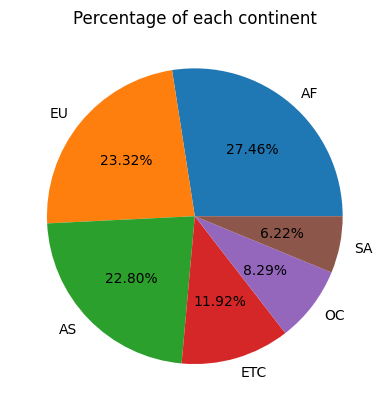

In [14]:
# plt.pie(데이터의 실질적인 값, labels=데이터의 레이블 리스트)

import matplotlib.pyplot as plt

plt.pie(pie_values, labels = pie_labels, autopct = "%.2f%%")
plt.title("Percentage of each continent")
plt.show()

### 04 GroupBy를 이용한 통계 확인

In [15]:
# 데이터프레임의 이름.groupby('그룹핑 기준이 되는 열')['보고자 하는 열'].통계 함수
# 어떤 대륙이 평균적으로 맥주를 더 먹을까요?

drink_df.groupby('continent')['beer_servings'].mean()

continent
AF      61.471698
AS      37.045455
ETC    145.434783
EU     193.777778
OC      89.687500
SA     175.083333
Name: beer_servings, dtype: float64

In [16]:
# 각 대륙 별로 와인 소비에 대한 통계 정보를 출력해볼까요?
drink_df.groupby('continent')['wine_servings'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
ETC,23.0,24.521739,28.266378,1.0,5.0,11.0,34.00,100.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


In [18]:
# 모든 컬럼에 대해서 대륙별로 평균 알콜 소비량을 출력해볼까요
drink_df.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
ETC,145.434783,165.739130,24.521739,5.995652
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


In [22]:
# 전체 평균보다 많은 알코올을 섭취하는 대륙을 구해봅시다.
total_mean = drink_df.total_litres_of_pure_alcohol.mean()
continent_mean = drink_df.groupby('continent')['total_litres_of_pure_alcohol'].mean()

result = continent_mean[continent_mean >= total_mean]
print(result)

continent
ETC    5.995652
EU     8.617778
SA     6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [23]:
# 평균 wine_servings이 가장 높은 대륙을 구해봅시다.
drink_df.groupby('continent')['wine_servings'].mean().idxmax()

'EU'